In [96]:
%load_ext autoreload
%autoreload 2
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import imports.stochastic_plots as stoch
import imports.examen_ordinaria_PE_2021_2022 as pe
import imports.BM_simulators as sim
import imports.sde_solvers as sde

# Set figure default size
_ = plt.rcParams['figure.figsize'] = (10, 6)

# Set number of decimals to print with numpy
np.set_printoptions(formatter={'float': lambda x: "{:0.4f}".format(x)})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exercise 1: Simulation of a Continuous-time Markov Chain

Consideremos una sede en red (website) compuesta por tres páginas cuyas etiquetas son P1, P2, P3, respectivamente. Para identificar usuarios con un comportamiento atípico supondremos que el patr´on de navegación sigue una cadena de Markov en tiempo continuo. Con el fin estimar los parámetros del modelo hemos recopilado datos de navegación para un grupo representativo de usuarios. Los datos han sido registrados el mismo día de la semana y a la misma hora, de forma que podamos asumir que los parámetros del modelo son constantes con el tiempo.

Los resultados de las mediciones son los siguientes:

- En promedio, los usuarios pasan 2 minutos en P1, 30 segundos en P2 y 1 minuto en P3.
- Las transiciones entre páginas del sitio en red tienen las siguientes probabilidades.

| Estado inicial / final | P1  | P2  | P3  |
|------------------------|-----|-----|-----|
| P1                     | *   | 0.2 | 0.8 |
| P2                     | 0.3 | *   | 0.7 |
| P3                     | 0.6 | 0.4 | *   |


**a) Dibuja el diagrama de transiciones de la cadena de Markov. Etiqueta las transiciones con la probabilidad
correspondiente.**

![diagrama](figures/diagram_1.png)

**b) Escribe la matriz de transiciones para el proceso de saltos subyacente (jump process).**

La matriz será la siguiente:

$$
P = \begin{pmatrix}
    0 & 0.2 & 0.8 \\
    0.3 & 0 & 0.7 \\
    0.6 & 0.4 & 0 \\
\end{pmatrix}
$$

**c) Deriva la distribución estacionaria para el proceso de saltos.**

Sabemos que la distribución estacionaria del proceso de saltos $\tilde \pi$ es vector propio por la izquierda de la matriz de transición $P$ con valor propio 1:

$$
\tilde \pi^T P = \tilde \pi^T \longleftrightarrow
\begin{cases}
    \tilde \pi_1 = 0.3\tilde \pi_2 + 0.6\tilde \pi_3 \\
    \tilde \pi_2 = 0.2\tilde \pi_1 + 0.4\tilde \pi_3 \\
    \tilde \pi_3 = 0.8\tilde \pi_1 + 0.7\tilde \pi_2
\end{cases}
$$

Añadiendo la ecuación $\tilde \pi_1 + \tilde \pi_2 + \tilde \pi_3 = 1$ y [resolviendo el sistema de ecuaciones lineales con WolframAlpha](https://www.wolframalpha.com/input/?i=systems+of+equations+calculator&assumption=%7B%22F%22%2C+%22SolveSystemOf4EquationsCalculator%22%2C+%22equation1%22%7D+-%3E%22-x+%2B+0.3y+%2B0.6z+%3D+0%22&assumption=%22FSelect%22+-%3E+%7B%7B%22SolveSystemOf4EquationsCalculator%22%7D%7D&assumption=%7B%22F%22%2C+%22SolveSystemOf4EquationsCalculator%22%2C+%22equation2%22%7D+-%3E%220.2x+-+y+%2B+0.4z+%3D+0%22&assumption=%7B%22F%22%2C+%22SolveSystemOf4EquationsCalculator%22%2C+%22equation3%22%7D+-%3E%220.8x+%2B+0.7y+-+z+%3D+0%22&assumption=%7B%22F%22%2C+%22SolveSystemOf4EquationsCalculator%22%2C+%22equation4%22%7D+-%3E%22x+%2B+y+%2B+z+%3D+1%22) obtenemos:

$$
\tilde \pi^T = (\tilde \pi_1, \tilde \pi_2, \tilde \pi_3) = \left(\frac{36}{109}, \frac{26}{109}, \frac{47}{109}\right)
$$

**d) Deriva la distribución estacionaria para la cadena de Markov en tiempo continuo.**

Sabemos que el tiempo que un individuo pasa en una página web sigue una distribución exponencial de parámetro $\lambda$ con media $\frac{1}{\lambda}$. En nuestro caso, sabemos que las medias son $2$, $0.5$ y $1$ respectivamente, por lo que los lambdas asociados serán:

$$ (\lambda_1, \lambda_2, \lambda_3) = \left(\frac{1}{2}, 2, 1\right) $$

Además, sabemos que $\pi_j \propto \frac{\tilde \pi_j}{\lambda_j}$, y que $\pi_1 + \pi_2 + \pi_3 = 1$. Obtenemos:

$$
\left(\frac{\tilde \pi_1}{\lambda_1}, \frac{\tilde \pi_2}{\lambda_2}, \frac{\tilde \pi_3}{\lambda_3}\right) = \left(\frac{72}{109}, \frac{13}{109}, \frac{47}{109}\right) \propto \left(\frac{72}{132}, \frac{13}{132}, \frac{47}{132}\right) \rightarrow \\
\rightarrow \pi^T = \left(\frac{6}{11}, \frac{13}{132}, \frac{47}{132}\right)
$$

**e) Deriva el correspondiente generador infinitesimal.**

Sabemos que el generador infinitesimal para una cadena de Markov de tiempo contínuo cumple:

$$
g_{ij} = 
\begin{cases}
    \lambda_i \cdot p_{ij} \quad & \text{si } i \neq j \\
    - \lambda_i \quad & \text{si } i = j
\end{cases}
$$

En nuestro caso:

$$
G =
\begin{pmatrix}
    -\lambda_1 & 0.2 \cdot \lambda_1 & 0.8 \cdot \lambda_1 \\
    0.3 \cdot \lambda_2 & -\lambda_2 & 0.7 \cdot \lambda_2 \\
    0.6 \cdot \lambda_3 & 0.4 \cdot \lambda_3 & -\lambda_3 \\
\end{pmatrix} = 
\begin{pmatrix}
    -0.5 & 0.1 & 0.4 \\
    0.6 & -2 & 1.4 \\
    0.6 & 0.4 & -1 \\
\end{pmatrix}
$$

**f) A partir del generador infinitesimal deriva la distribución estacionaria del proceso y compárala con
el resultado anterior.**

Sabemos por una proposición vissta en clase que la distribución estacionaria de una cadena de Markov de tiempo contínuo con generador infinitesimal es el unico vector con norma 1 igual a 1 que cumple: $\pi^T G = 0$. Obtenemos el siguiente sistema de ecuaciones:

$$
\pi^T G = 0 \longleftrightarrow
\begin{cases}
    -0.5 \pi_1 + 0.6\pi_2 + 0.6\pi_3 = 0\\
    0.1\pi_1 -2\pi_2 + 0.4\pi_3 = 0 \\
    0.4\pi_1 + 1.4\pi_2 -\pi_3 = 0
\end{cases}
$$

De nuevo, añadimos la correspondiente ecuación $\pi_1 + \pi_2 + \pi_3 = 1$ y [resolvemos el correspondiente sistema de ecuaciones lineales con WolframAlpha](https://www.wolframalpha.com/input/?i=systems+of+equations+calculator&assumption=%7B%22F%22%2C+%22SolveSystemOf4EquationsCalculator%22%2C+%22equation1%22%7D+-%3E%22-0.5x+%2B+0.6y+%2B0.6z+%3D+0%22&assumption=%22FSelect%22+-%3E+%7B%7B%22SolveSystemOf4EquationsCalculator%22%7D%7D&assumption=%7B%22F%22%2C+%22SolveSystemOf4EquationsCalculator%22%2C+%22equation2%22%7D+-%3E%220.1x+-+2y+%2B+0.4z+%3D+0%22&assumption=%7B%22F%22%2C+%22SolveSystemOf4EquationsCalculator%22%2C+%22equation3%22%7D+-%3E%220.4x+%2B+1.4y+-+z+%3D+0%22&assumption=%7B%22F%22%2C+%22SolveSystemOf4EquationsCalculator%22%2C+%22equation4%22%7D+-%3E%22x+%2B+y+%2B+z+%3D+1%22) obteniendo:

$$
\pi^T = \left(\frac{6}{11}, \frac{13}{132}, \frac{47}{132}\right)
$$

como queríamos demostrar.

**g) Simula trayectorias del proceso suponiendo que en el instante t = 0 el sistema se encuentra en el
estado P(t = 0) = P1.**

Nuestra simulación considera los estados empezando por el cero. Renombrar los estados originales a $P_0, P_1, P_2$. 

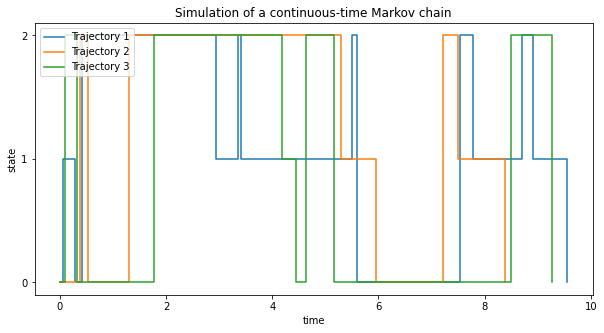

In [25]:
transition_matrix = [[  0,   0.2, 0.8], 
                     [  0.3,   0, 0.7],
                     [0.6, 0.44, 0]]
lambda_rates = [0.5, 2, 1]
t0 = 0.0
t1 = 10.0
state_0 = 0

# Simulate and plot a trajectory.
M = 3 # Number of simulations
N = 100 # Time steps per simulation

arrival_times_CTMC, trajectories_CTMC = (
    pe.simulate_continuous_time_Markov_Chain(
    transition_matrix, lambda_rates, 
    state_0, M, t0, t1))

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10,5), num=1)
for m in range(M):
    ax.step(arrival_times_CTMC[m], 
            trajectories_CTMC[m],
            where='post')
ax.set_ylabel('state')
ax.set_yticks([0, 1, 2])
ax.set_xlabel('time')
ax.legend(['Trajectory {}'.format(i) for i in range(1, M+1)], loc='upper left')
_ = ax.set_title('Simulation of a continuous-time Markov chain')

**h) Utilizando la secuencia de estados de la cadena de Markov en el régimen estacionario:**
    
**i. Estima la distribución estacionaria del proceso de saltos subyacente a partir de una única trayectoria
de la cadena de Markov en tiempo continuo.**

**ii. Estima la distribución estacionaria de la cadena de Markov en tiempo continuo a partir de una
única trayectoria del proceso.**

**iii. Estima la distribución de la cadena de Markov en tiempo continuo en el límite $t \rightarrow \infty$ a partir
de los estados finales en M = 1000 trayectorias simuladas.**

**iv. Comenta los resultados de los apartados anteriores.**

In [85]:
# i. Stationary distribution of the jump process from a single trajectory
t_1 = 1000
n_initial_removed = 10
arrival_times_CTMC, trajectories_CTMC = \
    pe.simulate_continuous_time_Markov_Chain(
    transition_matrix, lambda_rates, 
    state_0, M=1, t0=0, t1=t_1)

N_states = len(lambda_rates)
traj = np.array(trajectories_CTMC[0])[n_initial_removed:]
times = arrival_times_CTMC[0][n_initial_removed:]

estimation = np.array([(traj == i).sum() for i in range(N_states)]) * 1.0 / len(traj)

print('Estimation of \\tilde \\pi:', estimation)
print('Real value of \\tilde \\pi: [{:0.4f} {:0.4f} {:0.4f}]'.format(36.0/109, 26/109, 47/109))

Estimation of \tilde \pi: [0.3304 0.2357 0.4339]
Real value of \tilde \pi: [0.3303 0.2385 0.4312]


In [88]:
# ii. Stationary distribution of the CTMC from a single trajectory
arrival_times_CTMC, trajectories_CTMC = \
    pe.simulate_continuous_time_Markov_Chain(
    transition_matrix, lambda_rates, 
    state_0=state_0, M=1, t0=0, t1=t_1)

N_states = len(lambda_rates)
traj = np.array(trajectories_CTMC[0])[n_initial_removed:]
times = arrival_times_CTMC[0][n_initial_removed:]

estimation = np.repeat(0.0, N_states)
for t1, t2, state in zip(times[:-1], times[1:], traj[:-1]):
    estimation[state] += t2 - t1

print(estimation)
    
estimation = np.array(estimation) * 1.0 / t_1

print('Estimation of \\pi:', estimation)
print('Real value of \\pi: [{:0.4f} {:0.4f} {:0.4f}]'.format(6/11, 13/132, 47/132))

[514.8818 103.7358 368.9784]
Estimation of \pi: [0.5149 0.1037 0.3690]
Real value of \pi: [0.5455 0.0985 0.3561]


In [63]:
# iii. Stationary distribution of the CTMC from the final state in a sample of M trajectories
t_1 = 10.0
M = 1000
state_0 = 0
arrival_times_CTMC, trajectories_CTMC = \
    pe.simulate_continuous_time_Markov_Chain(
    transition_matrix, lambda_rates, 
    state_0=state_0, M=M, t0=0.0, t1=t_1)

final_states = np.array([ single_traj[-1] for single_traj in trajectories_CTMC ])
estimation = np.array([(final_states == i).sum() for i in range(N_states)]) * 1.0 / M

print('Estimation of \\pi:', estimation)
print('Real value of \\pi: [{:0.4f} {:0.4f} {:0.4f}]'.format(6/11, 13/132, 47/132))

Estimation of \pi: [0.5340 0.1110 0.3550]
Real value of \pi: [0.5455 0.0985 0.3561]


Para estimar la distribución estacionaria para el proceso de saltos a partir de una única trayectoria podemos fijarnos en dónde está el proceso en cada instante temporal. Para ello quitamos los $n_{initial-removed}$ tiempos iniciales (para simular que el proceso comience en un estado aleatorio) y estimamos la probabilidad de estar en un estado por la proporción de veces que estuvo en dicho estado.

Para estimar la distribución estacionaria de la cadena de Markov en tiempo contínuo repetimos el proceso anterior teniendo en cuenta el tiempo que pasamos en cada estado. Repetimos un proceso análogo al anterior y estimamos la probabilidad de estar cada estado por la proporción de tiempo que pasó la trayectoria en dicho estado.

A pesar de quitar los primeros $n_{initial-removed}$, para tiempos bajos hay mucha variabilidad en los resultados. Si tomamos un valor de tiempo final bajo ($t_1 = 10$ o $t = 100$) los resultados varían mucho entre ejecuciones. Es por ello que tomamos un alto valor de tiempo final ($t_1 = 1000$) para la estimación realizada.

De cara a estimar la distribución estacionaria de la cadena de Markov en tiempo contínuo utilizando múltiples trayectorias, bastará con simular el número requerido de trayectorias y utilizar la última posición de cada trayectoria. Estimaremos la probabilidad de estar en cada estado por la proporción de trayectorias que terminaron en dicho estado.

Cabe destacar un detalle interesante del código: hemos creado un bucle `while` con condición `True` para luego utilizar un `break`. Aunque esta práctica esta desaconsejada en el caso general, en un bucle tan pequeño sigue siendo completamente legible. Además, hemos de tener cuidado con la condición de parada de nuestro algoritmo. Si simplemente cambiasemos la condición del `while` a `t > t1`, estaríamos incluyendo un paso adicional en la trayectoria. Es decir, **estaríamos computando las trayectorias hasta un paso después del instante $t=t_1$**. Cada trayectoria daría ese salto adicional en un tiempo distinto, y estaríamos comparando trayectorias en distintos estados temporales, no obteniendo así la distribución $\pi$ buscada.

Finalmente, vemos como las estimaciones de los resultados son bastante cercanos al resultado esperado en cada uno de los apartados.

**i) ¿Coinciden las distribuciones estacionarias para una cadena de Markov en tiempo discreto y para el proceso en tiempo continuo, ambas con el mismo diagrama de transición? En caso de que coincidan indica la razón. En caso de que no coincidan, define una cadena de Markov en tiempo continuo con el mismo diagrama de transiciones que tenga la misma distribución estacionaria que la correspondiente en tiempo discreto.**

Como comentamos en el apartado anterior, la distribución estacionaria de la cadena en tiempo contínuo $\pi$ se computa a partir de la estacionaria del proceso de saltos $\tilde \pi$ utilizando que:

$$\pi_j \propto \frac{\tilde \pi_j}{\lambda_j}$$

Además, la definición de un proceso de saltos subyacente únicamente tiene en cuenta la matriz de transición. Es decir, $\tilde \pi$ coincide con la distribución estacionaria de la cadena de Markov en tiempo discreto. Por lo tanto, la distribuciones estacionarias $\pi$ y $\tilde \pi$ coinciden si y sólo si $\lambda_i = \lambda_j$ para todo $i,j$, suponiendo que ambas tenga la misma matriz de transición.

En nuestro caso particular las matrices de transición son la misma pero los lambdas son distintos entres si, por lo que las distribuciones estacionarias no coinciden.

Como ejemplo de proceso en el que si coinciden bastaría tomar la misma matriz de transición y los lambdas todos iguales.

**j) En el modelo hemos supuesto que no hay usuarios que accedan desde paginas externas o abandonen el sito en red: todas las transiciones son entre páginas dentro del sitio. ¿Cómo podríamos modificar el modelo de forma que se tengan en cuenta los usuarios que acceden y los que abandonan el sitio en red durante el tiempo de observación? ¿En qué condiciones el modelo modificado alcanzaría un estado estacionario?**

**Idea 1:**

Para modelar la salida de usuarios del sistema bastaría con añadir un nuevo estado absorbente a nuestra cadena de Markov. Este estado simboliza que los usuarios que llegan a él abandona el sistema. Añadiríamos una transición desde cada estado de nuestra página web al estado absorbente con su debida probabilidad, modelando como los usuarios pueden salir del sistema.

Para modelar la llegada de nuevos usuarios al sistema, sabemos que la llegada de nuevos usuarios al sistema queda modelada por un proceso de llegada. Suponiendo que dicho proceso de llegada sea homogéneo$^{(1)}$ (es decir, los tiempos de llegada no depende del tiempo total sino únicamente del tiempo de la última llegada), este sigue una distribución exponencial. Para añadir la llegada de nuevos usuarios añadiría un nuevo estado al sistema conectado a todos los demás excepto al estado de salida. probabilidad de pasar del estado de entrada a cada uno de los estados será la probabilidad de que un usuario llegue a nuestro sitio web entrado en dicha página específica. Por ejemplo, la llegada a la página principal o índice tiene una probabilidad mayor de entrada.

El estado de entrada es particular. Es un estado al que no podemos llegar desde ningún otro. Su proceso de llegada nos indica que se genera un nuevo usuario dentro del sistema, no que un usuario presente en el mismo cambia de estado.

Podríamos unir ambos modelos combinando el estado de entrada y salida en un único estado. Sin embargo, esto asumiría que hay un número constante de usuarios en el sistema, lo que no tiene por qué ser cierto.

Para esta modelización, ¿a qué nos referimos con estado estacionario? Según hemos modelado nuestro sistema, los usuarios que llegan al estado de salida *mueren*. Esto es sencillo de simular utilizando un ordenador, al igual que la generación de los mismos. Sin embargo, a nivel teórico la definición de estado estacionario utilizada hasta ahora (el vector propio con valor propio 1 por la izquierda de la matriz de transición) no tiene por que ser único, ya que la matriz de transición tiene una fila de ceros (la del estado absorbente de salida).

Podríamos redefinir lo que significa alcanzar un estado estacionario $\bar \pi$. Sea $\eta$ el ratio de entrada/salida a nuestro sistema. esto es:

$$
\eta = \frac{\text{#usuarios entrantes}}{\text{#usuarios salientes}}
$$

- Si $\eta > 1$, entran más usuarios de los que salen toda la población mundial acabaría entrando en nuestra página web y quedándose en ella. La nueva distribución estacionaría $\bar \pi$ coincidiría con la distribución $\pi$ de la cadena de Markov de tiempo contínuo sin los estados de entrada y salida.

- Si $\eta = 1$, entran y salen el mismo número de usuarios en promedio. La distribución estacionaria se alcanzaría, pero no tendría por qué coincidir con la de la cadena de Markov de tiempo contínuo si las probabilidades de entrada a cada uno de los estados son distintas. Para calcular esta distribución podemos tener en cuenta que el número de usuarios de nuestro sistema es constante y referirnos a la segunda idea.

- Si $\eta < 1$, salen más usuarios de los que entran a la página web y tenderíamos a no tener usuarios en la misma. La distribución estacionaria (probabilidad de estar en cada estado en tiempo infinito) tendería a ser cero en todos los estados de la página web.

**Idea 2:**

La segunda idea consiste en asumir la hipótesis que antes dimos como falsa: el número de usuarios en el sistema es constante. Modelizamos así un único estado fuera del sistema uniendo los estados de entrada y salida, y cada trayectoria es un usuario de internet, no de nuestra página web. Obtenemos un nueva nueva matriz de transición, cuya distribución estacionaria se puede calcular como hasta ahora.

El principal problema de este modelo es la simulación del mismo. Para una simulación fehaciente hemos de asumir una cantidad de usuarios fuera del sistema mucho mayor que dentro del sistema, y se vuelve realmente ineficiente. Es por ello que la idea 1 puede dar mejores resultados en simulaciones dependiendo de las probabilidades de entrada y salida del sistema.

**Alcanzar un estado estacionario**

Sabemos que el sistema alcanza un estado estacionario cuando existe un tiempo $T$ tal que para todo tiempo $t > T$ el sistema está en un estado fijo con probabilidad 1. Esto es, la distribución estacionaria tiene $0$ en todas sus posiciones y un $1$ en una.

Sabemos que la distribución estacionaria depende de $\eta$. En particular:

- Si $\eta < 1$ se alcanzará un estado estacionario: todos los usuarios estarán fuera del sistema.

- Si $\eta > 1$ se alcanzará un estado estacionario si y sólo si la distribución estacionaria de la cadena de Markov de tiempo contínuo reducida (sin estados de entrada y salida) tiene un estado estacionario, y será dihco estado.

- Si $\eta = 1$, para que se alcance un estado estacionario necesitamos que la cadena reducida tenga un estado estacionario. Sin embargo, aunque en el interior de la web todos los usuarios tenderán a estar en un único estado, se mantedrán la proporción con las condiciones iniciales.

Por ejemplo, si inicialmente hay una proporción de $p_i$ usuarios en el estado $i$, el último estado $M$ es el estado que representa estar fuera del sistema, y el estado estacionario de la cadena de Markov reducida es el $0$, la distribución estarcionaria será:

$$
    \bar \pi = \left( \sum_{i=1}^{M-1}p_i, 0, \ldots, 0, p_M\right)
$$

Se alcanzará un estado estacionario en este caso si y sólo si $p_M = 0$ o $p_M = 1$.

**Caso particular**

Cuando generalizamos un modelo es buena práctica asegurarse de que el modelo reducido es caso particular del modelo completo. En este caso, el modelo reducido asume que el número de usuarios que entran y salen de la página es $0$, y que todos los usuarios inicialmente están dentro del sistema ($p_M = 0$ en nuestro último ejemplo).

El modelo encaja a la perfección y se alcanzará un estado estacionario si y sólo si la cadena reducida alcanza un estado estacionario, como cabría esperar.

Como nota final, cabe destacar que este proceso podría modelarse utilizando una cadena de Markov de muerte-nacimiento.

(1): En la realidad, la probabilidad de entrada de un usuario a nuestro sitio web dependerá de la tiempo actual. Es decir, la probabilidad de que un usuario entre a nuestra página a las 12 del medio día será distinta que la de entrar a las 12 de la noche, y será distinta que entrar a las 12 de la noche el dia 31 de diciembre. Este modelo es una simplificación de la realidad por este motivo entre muchos otros.

# Exercise 2: Modelo de Vasicek

En el modelo de Vasicek se realiza la suposición de que la curva que describe la evolución del tipo de interés a corto plazo con el tiempo ($r(t)$) es una realización de un proceso de Ornstein-Uhlenbeck. La ecuación diferencial estocástica para este proceso es

\begin{equation}
    dr(t) = −\alpha (r(t) − r_\infty) dt + \sigma dW(t), \quad r(s) \perp dW(t), ∀s ≤ t
\end{equation}

donde $\alpha > 0$ es la tasa de reversión a la media, $r_\infty$ el tipo de interés a largo plazo y $\sigma > 0$ la volatilidad instantánea.

Este proceso tiene las siguientes propiedades:
- Es estacionario.
- Presenta reversión a la media.

La solución de esta ecuación diferencial estocástica para $t \ge t_0$ a partir de la condición inicial $r(t_0) = r_0$ es 

\begin{equation}
    r(t) = r_\infty + (r_0 − r_\infty) e^{-\alpha(t - t_0)}
        + \sigma \sqrt{\frac{1 - e^{-2\alpha(t-t_0)}}{2\alpha}}
        Z, \quad Z \sim N(0, 1)
\end{equation}

**a) A partir de Eq. (2) deriva las expresiones para $\mathbb E[r(t)|r(t_0) = r_0]$ y $\text{Cov}[r(t), r(t')|r(t_0) = r_0]$.**

En primer lugar, identificamos la Eq. 1 con la ecuación diferencial asociada a un proceso de Ornstein-Uhlenbeck:

$$
    dX(t) = -k X(t)dt + \sqrt D dW(t)
$$

donde identificamos $X(t) = (r(t) - r_\infty)$, $dX(t) = dr(t)$, $k = \alpha$ y $\sigma^2 = D$.

Para calcular la esperanza, tomamos esperanza respecto a la variable $Z$ en la Eq. (2) pues el resto de valores son constantes. Utilizando el linealidad del operador esperanza y $\mathbb E[Z] = 0$ obtenemos:

$$
    \mathbb E[r(t)|r(t_0) = r_0] = r_\infty + (r_0 − r_\infty) e^{-\alpha(t - t_0)}
$$

Para la covarianza, utilizamos que la bilinealidad:

$$\text{Cov}[aX + bY,Z] = a\text{Cov}[X,Z] + b\text{Cov}[Y,Z],$$

y que la covarianza con una constante es 0:

$$
\begin{align*}
    \text{Cov}[r(t), r(t')|r(t_0) = r_0] & = \text{Cov}\left[\frac{\sigma}{\sqrt{2\alpha}} \sqrt{1 - e^{-2\alpha(t-t_0)}}Z, \frac{\sigma}{\sqrt{2\alpha}} \sqrt{1 - e^{-2\alpha(t'-t_0)}}Z \; \bigg| \; r(t_0) = r_0\right] \\
    & = \frac{\sigma^2}{2\alpha} \sqrt{1 - e^{-2\alpha(t-t_0)}} \sqrt{1 - e^{-2\alpha(t'-t_0)}} \cdot \text{Cov}[Z, Z] \\
    & = \frac{\sigma^2}{2\alpha} \sqrt{1 - e^{-2\alpha(t-t_0)}} \sqrt{1 - e^{-2\alpha(t'-t_0)}}, \\
\end{align*}
$$

donde hemos usado que $\text{Cov}[Z,Z] = \text{Var}[Z] = 1$.

**b) Suponiendo que $r_\infty$ y $r_0$ son del mismo orden de magnitud, y en función de los parámetros del modelo ¿En qué escala de tiempo se alcanza el estado estacionario para este proceso?**

**Teniendo en cuenta que en doble precisión los valores $1.0$ y $(1.0 + \epsilon)$ con $\epsilon \approx 10^{-16}$ son idénticos, ¿cuánto tiempo es necesario simular para que se pueda considerar que, numéricamente, el proceso está en estado estacionario?**

El estado estacionario del proceso es:

$$
    \hat r \substack{\Delta\\=} \lim_{t \rightarrow \infty} r(t) = r_{\infty} + \frac{\sigma}{\sqrt{2\alpha}}Z
$$

Denominamos al valor del límite $\bar r$. Suponiendo que $r_\infty$ y $r_0$ son del mismo orden de magnitud, esta estado se alcanza con velocidad exponencial.

De cara a la segunda pregunta, buscamos simular hasta un tiempo suficiente tal que el valor actual sea tan cercano al límite como se posible. Esto es, que la siguiente diferencia sea realmente baja:

$$
    |\hat r - r(t)| = \left| (r_0 - r_\infty) e^{-\alpha(t-t_0)} + \frac{\sigma}{\sqrt{2\alpha}} \left(\sqrt{1 - e^{-2\alpha(t-t_0)}} - 1\right) \right|
$$

Teniendo en cuenta que siempre habrá una diferencia notable entre ambos valores debido a la variabilidad de $Z$, podemos considerar que estamos lo suficientemente cerca del valor objetivo cuando $e^{-\alpha(t-t_0)}$ sea lo suficientemente pequeño. En particular, aquel valor del tiempo $\hat t$ a partir del cual numéricamente no habrá diferencia entre el límite y el valor de $r(\hat t)$ será el menor tiempo que cumpla $|e^{-\alpha(t-t_0)}| < 10^{-16}$. Esto es:

$$
    \hat t = \arg\min_{t} |e^{-\alpha(t-t_0)}| < 10^{-16}
$$

Este valor hace que ambos elementos en la expresión $|\hat r - r(t)|$ sean aún más pequeños que $10^{-16}$, no suponiendo ninguna diferencia numéricamente.

**c) A partir de las expresiones para $\mathbb E [r(t)|r(t_0) = r_0]$ y $\text{Cov}[r(t), r(t')|r(t_0) = r_0]$, deriva las expresiones para las funciones de media y de covarianza del proceso en el estado estacionario; es decir, $\mathbb E[r(t)]$ y
$\text{Cov}[r(t), r(t')]$.**

El proceso estacionario se alcanza cuando $t > \hat T$ calculado en el apartado anterior. En ese caso, calcular la esperanza del estado estacionaro (que como hemos visto ya no depende de la condicion inicial $r_0$), es equivalente a tomar ezperanza en la expresión de $\hat r$:

$$
    \mathbb E[\hat r] = r_{\infty} + \frac{\sigma}{\sqrt{2\alpha}} \mathbb E[Z] = r_\infty
$$

Para la covarianza utilizamos la expresión calculada en el primer apartado dándonos cuenta de que $r(t) = r(t')$ pues estamos en el estado estacionario:

$$
\begin{align*}
    \text{Cov}[r(t), r(t')] & = \text{Var}[r(t)] \\
    & = \frac{\sigma^2}{2\alpha} \sqrt{1 - e^{-2\alpha(t-t_0)}} \sqrt{1 - e^{-2\alpha(t-t_0)}} \\
    & = \frac{\sigma^2}{2\alpha} \left(1 - e^{-2\alpha(t-t_0)}\right) \\
\end{align*}
$$

Como el proceso es estacionario, esto es equivalente a tender $t$ a infinito, obteniendo como expresión en el límite:

$$
    \lim_{t \rightarrow \infty} \text{Cov}[r(t), r(t')] = \text{Var}[r(t)] = \frac{\sigma^2}{2\alpha}
$$

**d) A partir de los resultados de los apartados anteriores deriva la expresión de $\mathbb P[t, r(t)|t_0, r_0]$, la probabilidad de que el valor del tipo de interés a tiempo $t$ sea $r(t)$ dado que a tiempo $t_0$ su valor es $r(t_0) = r_0$.**

Nota: en los apartados del d) al f), la normal viene descrita en función de la varianza y no de la desviación típica como hemos hecho en clase.

Los valores que toma una nuestra ecuación diferencial siguen una distribución normal pues la única variabilidad viene dada por una variable aleatoria normal. La esperanza dde dicha variable fue calculada previamente, mientras que la desviación típica puede calcularse a partir de la expresión de la covarianza:

$$
\begin{align*}
    \text{Var}[r(t)|r(t_0) = r_0] & = \text{Cov}[r(t), r(t')|r(t_0) = r_0] \\
    & = \frac{\sigma^2}{2\alpha} \sqrt{1 - e^{-2\alpha(t-t_0)}} \sqrt{1 - e^{-2\alpha(t-t_0)}} \\
    & = \frac{\sigma^2}{2\alpha} \left(1 - e^{-2\alpha(t-t_0)} \right) \\
\end{align*}
$$

Por lo tanto, $r(t)$ sigue la siguiente distribución:

$$
    r(t) \sim N\left(r_\infty + (r_0 − r_\infty) e^{-\alpha(t - t_0)}, \frac{\sigma^2}{2\alpha} \left(1 - e^{-2\alpha(t-t_0)} \right) \right)
$$

La probabilidad pedida en el enunciado será la función de densidad de probabilidad de esta variable aleatoria.

**e) Deriva la expresión para $\mathbb P[t, r(t)|t_0, r_0]$ en el estado estacionario.**

Este apartado es equivalente al anterior, utilizando la esperanza y varianza del estado estacionario. Es decir, para un $t$ mayor que $\hat t$ obtendremos:

$$
    r(t) \sim N\left(r_\infty , \frac{\sigma^2}{2\alpha} \left(1 - e^{-2\alpha(t-t_0)}\right) \right)
$$

De nuevo, la probabilidad pedida coincide con la función de densidad de probabilidad de esta variable aleatoria.

**f) Deriva los siguientes límites**
$$
\lim_{t \rightarrow 0} \mathbb P[t, r(t)|t_0, r_0] \\
\lim_{t \rightarrow \infty} \mathbb P[t, r(t)|t_0, r_0]
$$
**y explica su significado.**

Para el primero caso tomamos límite en la distribución del apartado d):

$$
\begin{align*}
    \lim_{t \rightarrow 0} r(t) \sim \lim_{t \rightarrow 0} N\left(r_\infty + (r_0 − r_\infty) e^{-\alpha(t - t_0)}, \frac{\sigma^2}{2\alpha} \left(1 - e^{-2\alpha(t-t_0)} \right) \right) = N\left(r_0, 0 \right) = \delta(r_0)
\end{align*}
$$

Esto es equivalente a una delta de Dirac centrada en $r_0$. Obtenemos el valor del límite pedido:

$$
    \lim_{t \rightarrow 0} \mathbb P[t, r(t)|t_0, r_0] =
\begin{cases}
        1 \quad \text{si } r(t) = r_0 \\
        0 \quad \text{si } r(t) \neq r_0  
\end{cases}
$$

Es decir, en el instante inicial estaremos en la condición inicial con total probabilidad.

El segundo límite nos pide la distribución de probabilidad en tiempo infinito. Esto es, la función de densidad de probabilidad del estado estacionario:

$$
\lim_{t \rightarrow \infty} r(t) \sim \lim_{t \rightarrow \infty} N\left(r_\infty , \frac{\sigma^2}{2\alpha} \left(1 - e^{-2\alpha(t-t_0)}\right) \right) = N\left(r_\infty, \frac{\sigma^2}{2\alpha} \right)
$$

Por lo que el límite de la probabilidad buscada será la función de densidad de probabilidad de la variable normal con los parámetros descritos. Intuitivamente este nos indica como se distribuyen la trayectorias en el estado límite.

**g) Suponiendo que $r_\infty = 5\%$, $\tau_\alpha = 2$, $r_0 = 10\%$, simula $M = 10000$ trayectorias del proceso desde
$t_0 = 0$ (hoy) hasta $t_0 + T$ con $T = 15$ años, en $N = 100$ pasos de tiempo, utilizando los siguientes algoritmos:**

- **El algoritmo de Euler estocástico.**
- **El algoritmo de Milstein.**
- **La basada en la solución exacta, dada por Eq. (2).**

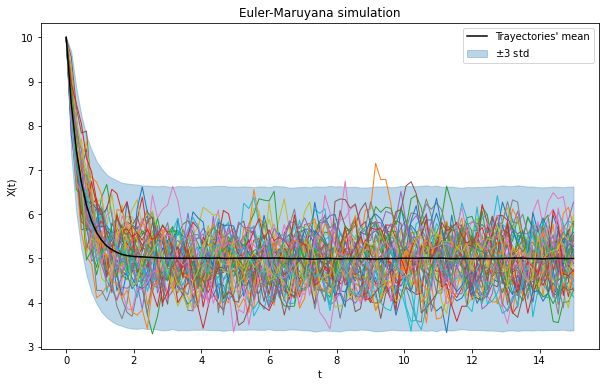

In [205]:
t0 = 0.0
x0 = 10.0 # r0
alpha = 2.0 # Como alfa no esta definido, entendemos alfa = tau_alfa
T = 15.0
r_inf = 5.0
M = 10000
N = 100
sigma = 1 # no definido, damos este valor por defecto

def a(t,x): return -alpha*(x - r_inf)
def b(t,x): return sigma

t, X_euler = sde.euler_maruyana(t0, x0, T, a, b, M, N)

stoch.plot_trajectories(t, X_euler, max_trajectories=50, fig_num=1)
sde.subplot_mean_and_std(t, np.mean(X_euler, axis=0),
                         3*np.std(X_euler, axis=0),
                         color='black')
plt.legend(['Trayectories\' mean', '$\pm$3 std'])
_ = plt.title('Euler-Maruyana simulation')

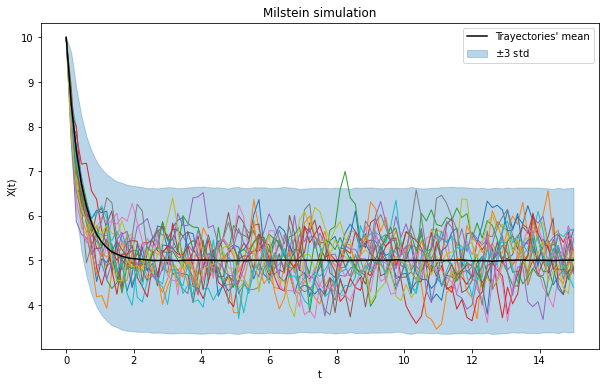

In [206]:
# Derivada de b respecto de x
def db_dx(t,x): return 0

t, X_milstein = sde.milstein(t0, x0, T, a, b, db_dx, M, N)
            
# Plot trajectories
stoch.plot_trajectories(t, X_milstein, fig_num=1)
sde.subplot_mean_and_std(t, np.mean(X_milstein, axis=0),
                         3*np.std(X_milstein, axis=0), color='black')
plt.legend(['Trayectories\' mean', '$\pm$3 std'])
_ = plt.title('Milstein simulation')

Para la simulación de la ecuación exacta utilizamos que el tercer término de la ecuación es un proceso de Wiener desplazado.

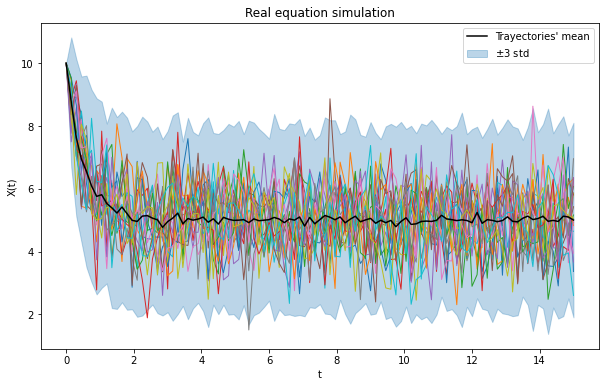

In [207]:
noise = np.random.normal(size=(N, M))
delta_t = 1.0 * T / N
times = sde.generate_regular_grid(t0, delta_t, N)

X_exact = \
np.array([
    [
        r_inf + (x0 - r_inf) * np.exp(-alpha*(ti - t0)) + \
        sigma * np.sqrt( (1-np.exp(-2*alpha*(ti-t0))) / 2*alpha) * zi
        for ti, zi in zip(times, local_noise)
    ] for local_noise in noise
])

# Plot trajectories
stoch.plot_trajectories(t, X_exact, fig_num=1)
sde.subplot_mean_and_std(t, np.mean(X_exact, axis=0),
                         3*np.std(X_exact, axis=0), color='black')
plt.legend(['Trayectories\' mean', '$\pm$3 std'])
_ = plt.title('Real equation simulation')

**h) Para cada una de las simulaciones, compara gráficamente las estimaciones muestrales de la media y la desviación estandar de $r(t)$ con sus valores exactos, derivados anteriormente, y con sus valores en el régimen estacionario.**

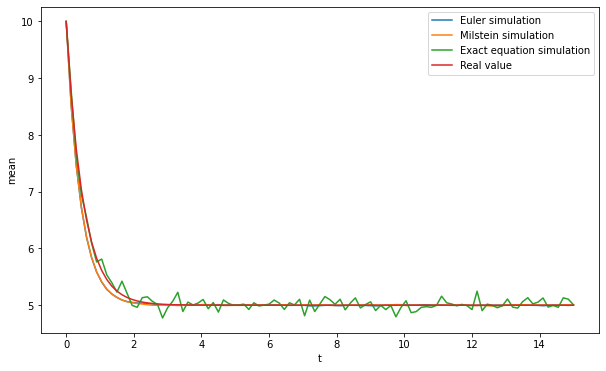

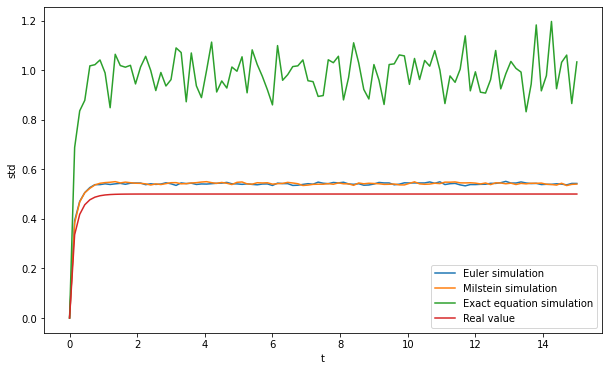

In [208]:
real_mean = r_inf + (x0 - r_inf)*np.exp(-alpha*(times - t0))
real_std = sigma / np.sqrt(2*alpha) * np.sqrt(1 - np.exp(-2*alpha*(times - t0)))

means = [np.mean(trajectories, axis=0)
         for trajectories in [X_euler, X_milstein, X_exact]]
means = np.vstack((means, real_mean))

stds = [np.std(trajectories, axis=0)
         for trajectories in [X_euler, X_milstein, X_exact]]
stds = np.vstack((stds, real_std))

plt.figure(0)
for mean_X in means:
    plt.plot(times, mean_X)
legend = ['Euler simulation', 'Milstein simulation', 'Exact equation simulation', 'Real value']
plt.legend(legend)
plt.xlabel('t')
_ = plt.ylabel('mean')

plt.figure(1)
for std_X in stds:
    plt.plot(times, std_X)
plt.legend(legend)
plt.xlabel('t')
_ = plt.ylabel('std')

Apenas distinguimos los valores de Euler y Milstein porque son realmente parecidos.

**i) Estima a partir de las simulaciones el valor de las autocorrelaciones en el régimen estacionario, $\rho(\tau) = \frac{\gamma(\tau)}{\gamma(0)}$, con $\gamma(\tau) = \text{Cov}[r(t + \tau), r(t)]$. Para ello, utiliza como referencia t = 10 años.**

Este ejercicio no está terminado por falta de tiempo.

In [223]:
t_fixed = 10
t_0 = 0

def gamma(tau, t_fixed=t_fixed):
    return sigma**2 / (2*alpha) * np.sqrt(1 - np.exp(-2*alpha*(t_fixed+tau-t_0))) * \
        np.sqrt(1 - np.exp(-2*alpha*(t_fixed-t_0)))

def rho(t):
    gamma_v = np.vectorize(gamma)
    gamma_v(t) / gamma_v(0)
    
rho_v = np.vectorize(rho)
# result = rho_v(times)
# plt.plot(times, rho(times))

**j) Dibuja las primeras $50$ trayectorias simuladas, superponiendo en la gráfica,**
- **La media condicional ($\mathbb E [r(t)|r(t_0) = r_0]$),**
- **La media condicional mas/menos 2 veces la distribución estándar condicional ($Std [r(t)|r(t_0) = r_0]$),**
- **La media incondicional ($\mathbb E [r(t)]$),**
- **La media incondicional mas/menos 2 veces la distribución estándar (Std $[r(t)]$).**

Utilizamos Milstein por ser más exacto.

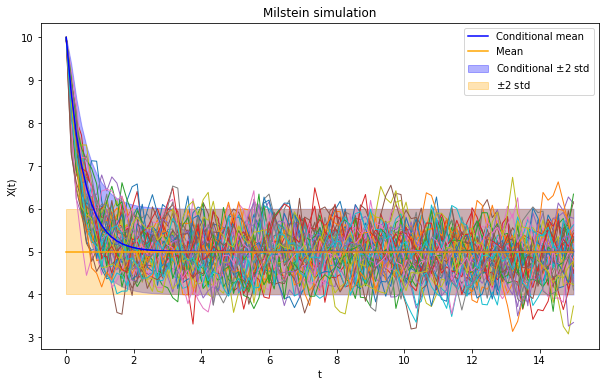

In [193]:
t, X_milstein = sde.milstein(t0, x0, T, a, b, db_dx, M, N)

conditional_mean = r_inf + (x0 - r_inf)*np.exp(-alpha*(times-t0))
conditional_std = sigma/np.sqrt(2*alpha) * np.sqrt(1 - np.exp(-2*alpha*(times - t0)))
unconditional_mean = np.array([r_inf for _ in range(len(times))])
unconditional_std = np.array([sigma/np.sqrt(2*alpha) for _ in range(len(times))])

# Plot trajectories
stoch.plot_trajectories(t, X_milstein, fig_num=1, max_trajectories=50)
plt.plot(times, conditional_mean, color='blue')
plt.plot(times, unconditional_mean, color='orange')
plt.fill_between(times, conditional_mean-2*conditional_std,
                 conditional_mean+2*conditional_std,
                 color='blue', alpha=0.3)
plt.fill_between(times, unconditional_mean-2*unconditional_std,
                 unconditional_mean+2*unconditional_std,
                 color='orange', alpha=0.3)
plt.legend(['Conditional mean', 'Mean', 'Conditional $\pm$2 std', '$\pm$2 std'])
_ = plt.title('Milstein simulation')

**k) Los valores de los parámetros del modelo utilizados para la simulación no reflejan la situación financiera actual. Busca información sobre el tipo de interés en España hoy (por ejemplo, el Euríbor),
el tipo de interés a largo plazo (por ejemplo, el que se utiliza en bonos a 10 años), la tasa de reversión a la media ($\alpha$) y la volatilidad ($\sigma$) y repite las simulaciones. Muestra la misma gráfica del apartado anterior (es decir, 50 trayectorias, junto con la media y la media más/menos 2 desviaciones estándar).**

Obtenemos los datos de los bonos de 10 años de [esta web](https://datosmacro.expansion.com/bono/espana) y el euribor de [esta web](https://datosmacro.expansion.com/hipotecas/euribor). No he encontrado datos sobre la tasa de reversión a la media, asi que asigno el valor $1$:

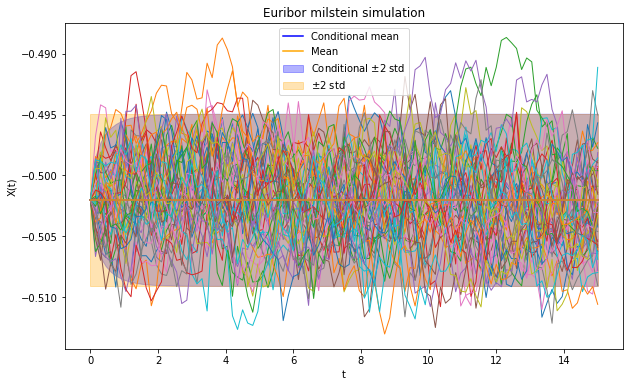

In [200]:
# Euribor
r_inf = -0.502
x0 = r_inf
sigma = -0.005
alpha = 1

t, X_milstein = sde.milstein(t0, x0, T, a, b, db_dx, M, N)

conditional_mean = r_inf + (x0 - r_inf)*np.exp(-alpha*(times-t0))
conditional_std = sigma/np.sqrt(2*alpha) * np.sqrt(1 - np.exp(-2*alpha*(times - t0)))
unconditional_mean = np.array([r_inf for _ in range(len(times))])
unconditional_std = np.array([sigma/np.sqrt(2*alpha) for _ in range(len(times))])

# Plot trajectories
stoch.plot_trajectories(t, X_milstein, fig_num=1, max_trajectories=50)
plt.plot(times, conditional_mean, color='blue')
plt.plot(times, unconditional_mean, color='orange')
plt.fill_between(times, conditional_mean-2*conditional_std,
                 conditional_mean+2*conditional_std,
                 color='blue', alpha=0.3)
plt.fill_between(times, unconditional_mean-2*unconditional_std,
                 unconditional_mean+2*unconditional_std,
                 color='orange', alpha=0.3)
plt.legend(['Conditional mean', 'Mean', 'Conditional $\pm$2 std', '$\pm$2 std'])
_ = plt.title('Euribor milstein simulation')

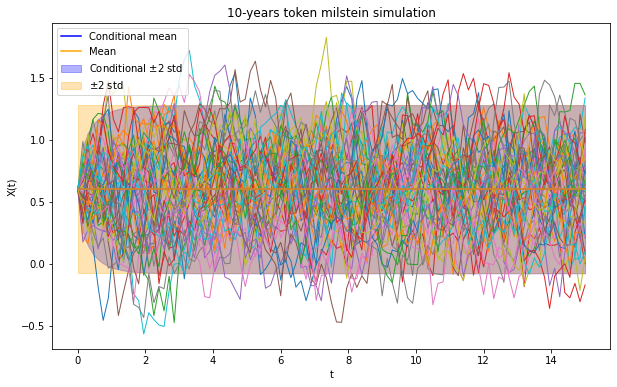

In [203]:
# Euribor
r_inf = 0.60
x0 = r_inf
sigma = -0.48
alpha = 1

t, X_milstein = sde.milstein(t0, x0, T, a, b, db_dx, M, N)

conditional_mean = r_inf + (x0 - r_inf)*np.exp(-alpha*(times-t0))
conditional_std = sigma/np.sqrt(2*alpha) * np.sqrt(1 - np.exp(-2*alpha*(times - t0)))
unconditional_mean = np.array([r_inf for _ in range(len(times))])
unconditional_std = np.array([sigma/np.sqrt(2*alpha) for _ in range(len(times))])

# Plot trajectories
stoch.plot_trajectories(t, X_milstein, fig_num=1, max_trajectories=50)
plt.plot(times, conditional_mean, color='blue')
plt.plot(times, unconditional_mean, color='orange')
plt.fill_between(times, conditional_mean-2*conditional_std,
                 conditional_mean+2*conditional_std,
                 color='blue', alpha=0.3)
plt.fill_between(times, unconditional_mean-2*unconditional_std,
                 unconditional_mean+2*unconditional_std,
                 color='orange', alpha=0.3)
plt.legend(['Conditional mean', 'Mean', 'Conditional $\pm$2 std', '$\pm$2 std'])
_ = plt.title('10-years token milstein simulation')

**l) A la vista de los resultados de las simulaciones,**
- **¿Qué quiere decir que el proceso tenga reversión a la media?**

Significa que tiende a la media.

- **¿En qué escala de tiempo se observa dicha reversión a la media?**

Como discutimos en el apartado a), se observación un reversión exponencial: en apenas un par de años hemos convergido a dicho valor.

- **¿Qué quiere decir que el proceso es estacionario?**

Significa que a partir de cierto valor, el proceso se estaciona en media (seguiremos teniendo variabilidad como se puede apreciar en las simulaciones).

- **¿Es la simulación realizada estacionaria?**

Si, todas ellas lo son. Aunque las trayectories oscilen, 

- **¿Cuál es la escala de tiempo para el régimen transitorio?**

El régimen transitorio es el régimen antes del estacionario. Esto dura entre unos y dos años en las simulaciones iniciales.

- **¿Qué relación hay entre las escalas de tiempo de reversión a la media y la correspondiente al régimen transitorio?**

Son equivalentes.